In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Resources/CA-daily_avg_O3_2010-2016.csv')
df.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,15,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
1,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
2,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
3,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,13,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
4,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
5,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
6,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,4,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
7,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,2,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
8,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,5,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
9,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473


In [3]:
# display the full list of columns
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [5]:
# extract only the relevant columns
df = df[['County Name', 'Date Local', 'Arithmetic Mean', '1st Max Value', '1st Max Hour']]

In [7]:
# display the modified df
df.head(10)

,County Name,Date Local,Arithmetic Mean,1st Max Value,1st Max Hour
0,Alameda,01/01/10,0.007632,0.018,10
1,Alameda,01/02/10,0.011958,0.020,11
2,Alameda,01/03/10,0.014458,0.020,9
3,Alameda,01/04/10,0.007958,0.015,9
4,Alameda,01/05/10,0.003667,0.010,9
5,Alameda,01/06/10,0.002167,0.007,10
6,Alameda,01/07/10,0.001667,0.005,8
7,Alameda,01/08/10,0.001083,0.002,5
8,Alameda,01/09/10,0.002292,0.006,8
9,Alameda,01/10/10,0.003333,0.009,10


In [8]:
# rename 'Arithmetic Mean' column to include units
df = df.rename(columns={"Arithmetic Mean": "Arithmetic Mean (ppm)"})

In [9]:
# display df
df.head()

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour
0,Alameda,01/01/10,0.007632,0.018,10
1,Alameda,01/02/10,0.011958,0.020,11
2,Alameda,01/03/10,0.014458,0.020,9
3,Alameda,01/04/10,0.007958,0.015,9
4,Alameda,01/05/10,0.003667,0.010,9


In [10]:
# create a new column in ppb by multiplying ppm by 1000
df['Arithmetic Mean (ppb)'] = df['Arithmetic Mean (ppm)'] * 1000
df.head()

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour,Arithmetic Mean (ppb)
0,Alameda,01/01/10,0.007632,0.018,10,7.632
1,Alameda,01/02/10,0.011958,0.020,11,11.958
2,Alameda,01/03/10,0.014458,0.020,9,14.458
3,Alameda,01/04/10,0.007958,0.015,9,7.958
4,Alameda,01/05/10,0.003667,0.010,9,3.667


In [41]:
#for index, row in df.iterrows():
    #row['Date'] = row['Date Local'].split("/")[0]

In [11]:
# convert 'Date Local' column to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'])

In [12]:
# show that 'Date Local' column was successfully converted
df.head()

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour,Arithmetic Mean (ppb)
0,Alameda,2010-01-01,0.007632,0.018,10,7.632
1,Alameda,2010-01-02,0.011958,0.020,11,11.958
2,Alameda,2010-01-03,0.014458,0.020,9,14.458
3,Alameda,2010-01-04,0.007958,0.015,9,7.958
4,Alameda,2010-01-05,0.003667,0.010,9,3.667


In [13]:
# extract only the month from the 'Date Local' column and store this in a new column
df['Month'] = pd.DatetimeIndex(df['Date Local']).month

In [14]:
df.head()

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour,Arithmetic Mean (ppb),Month
0,Alameda,2010-01-01,0.007632,0.018,10,7.632,1
1,Alameda,2010-01-02,0.011958,0.020,11,11.958,1
2,Alameda,2010-01-03,0.014458,0.020,9,14.458,1
3,Alameda,2010-01-04,0.007958,0.015,9,7.958,1
4,Alameda,2010-01-05,0.003667,0.010,9,3.667,1


In [15]:
# note that there appears to be 4 different measurements per day
test = df.loc[(df['County Name'] == 'Alameda') & (df['Date Local']=='01/01/10')]
test

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour,Arithmetic Mean (ppb),Month
0,Alameda,2010-01-01,0.007632,0.018,10,7.632,1
365,Alameda,2010-01-01,0.010789,0.020,9,10.789,1
746,Alameda,2010-01-01,0.008737,0.021,10,8.737,1
1050,Alameda,2010-01-01,0.005750,0.010,8,5.750,1


In [16]:
# extract only relevant columns and create a groupby df
mean_df = df.loc[:, ['County Name', 'Month', 'Arithmetic Mean (ppb)']]
county_date = pd.DataFrame(mean_df.groupby(['County Name', 'Month']).mean())
county_date

Arithmetic Mean (ppb)
County Name Month                       
Alameda     1                  12.296476
            2                  16.000089
            3                  23.264782
            4                  27.326667
            5                  26.718040
            6                  21.562925
            7                  22.686621
            8                  21.173355
            9                  20.079408
            10                 18.170777
            11                 15.490133
            12                 12.495196
Amador      1                  13.107581
            2                  17.184464
            3                  23.321194
            4                  25.688967
            5                  27.352806
            6                  27.586133
            7                  35.570667
            8                  38.564452
            9                  36.101138
            10                 25.681419
            11                 16.694333
            12                 16.882742
Butte       1                  20.887081
            2                  24.790143
            3                  34.893113
            4                  37.051383
            5                  37.907887
            6                  36.504917
...                                  ...
Tuolumne    7                  48.079742
            8                  45.623710
            9                  42.234800
            10                 28.068548
            11                 19.709733
            12                 19.881097
Ventura     1                  22.078123
            2                  23.573850
            3                  33.024981
            4                  34.107756
            5                  33.481640
            6                  32.877950
            7                  31.985505
            8                  30.544489
            9                  32.185750
            10                 29.361688
            11                 26.957617
            12                 20.619866
Yolo        1                  13.961306
            2                  18.454571
            3                  25.923145
            4                  29.152509
            5                  30.138500
            6                  25.544583
            7                  27.645790
            8                  25.228935
            9                  24.308023
            10                 22.414300
            11                 20.449417
            12                 17.523127

[588 rows x 1 columns]

Text(0.5,0,'Month')

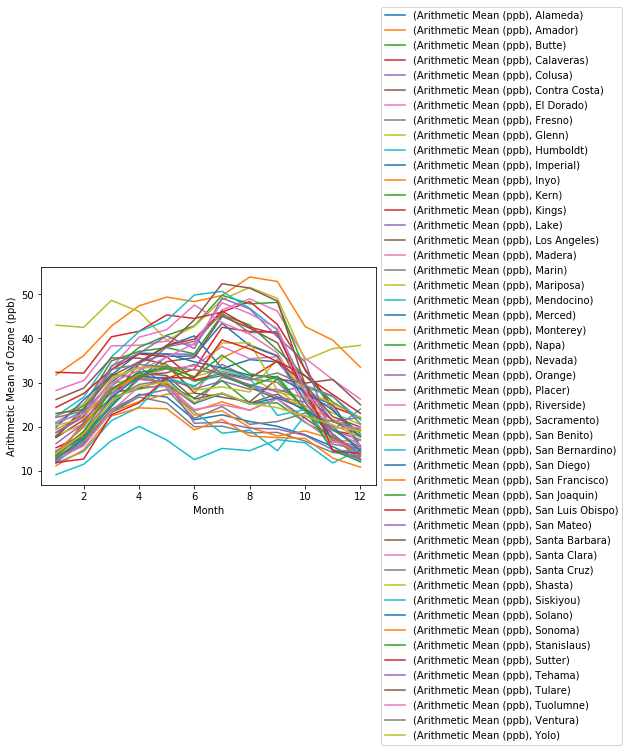

In [17]:
county_date.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("")
plt.ylabel("Arithmetic Mean of Ozone (ppb)")
plt.xlabel("Month")

### Goal: Find county with lowest ppb values and county with highest ppb values and only graph these

In [25]:
# find the county with the highest ppb
max_ppb = county_date['Arithmetic Mean (ppb)'].max()
max_county = county_date.loc[county_date['Arithmetic Mean (ppb)'] == max_ppb,:]
max_county

,,Arithmetic Mean (ppb)
County Name,Month,
Inyo,8,53.915667


In [26]:
# find the county with the lowest ppb
min_ppb = county_date['Arithmetic Mean (ppb)'].min()
min_county = county_date.loc[county_date['Arithmetic Mean (ppb)'] == min_ppb,:]
min_county

,,Arithmetic Mean (ppb)
County Name,Month,
Mendocino,1,9.138903


In [27]:
# create a df with only the Inyo & Mendocino counties
minmax_df = df.loc[(df['County Name']=='Inyo') | (df['County Name']=='Mendocino'),:]
minmax_df

,County Name,Date Local,Arithmetic Mean (ppm),1st Max Value,1st Max Hour,Arithmetic Mean (ppb),Month
9274,Inyo,2010-01-01,0.029625,0.033,0,29.625,1
9275,Inyo,2010-01-02,0.029583,0.031,13,29.583,1
9276,Inyo,2010-01-03,0.028458,0.030,0,28.458,1
9277,Inyo,2010-01-04,0.026958,0.028,0,26.958,1
9278,Inyo,2010-01-05,0.026542,0.028,0,26.542,1
9279,Inyo,2010-01-06,0.026000,0.028,17,26.000,1
9280,Inyo,2010-01-07,0.027571,0.031,22,27.571,1
9281,Inyo,2010-01-08,0.029250,0.031,20,29.250,1
9282,Inyo,2010-01-09,0.028000,0.030,0,28.000,1
9283,Inyo,2010-01-10,0.026375,0.027,10,26.375,1


In [29]:
# choose only the relevant columns and groupby county name and month for Inyo & Mendocino
mm_mean_df = minmax_df.loc[:, ['County Name', 'Month', 'Arithmetic Mean (ppb)']]
mm_df = pd.DataFrame(mm_mean_df.groupby(['County Name', 'Month']).mean())
mm_df

Arithmetic Mean (ppb)
County Name Month                       
Inyo        1                  31.722774
            2                  36.122036
            3                  42.775516
            4                  47.379167
            5                  49.360194
            6                  48.333733
            7                  49.730048
            8                  53.915667
            9                  52.894433
            10                 42.680000
            11                 39.609733
            12                 33.452194
Mendocino   1                   9.138903
            2                  11.493893
            3                  16.837258
            4                  20.076833
            5                  16.975839
            6                  12.531967
            7                  15.072548
            8                  14.561452
            9                  17.071167
            10                 16.344645
            11                 11.790000
            12                 14.862000

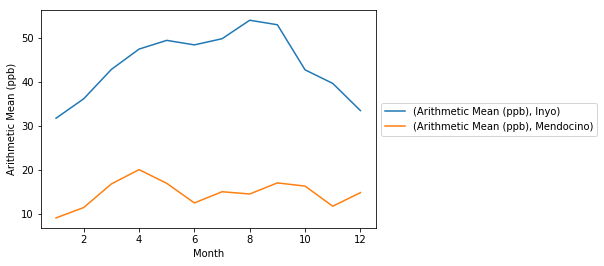

In [32]:
mm_df.unstack(0).plot()
plt.xlabel('Month')
plt.ylabel('Arithmetic Mean (ppb)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))